In [1]:
%matplotlib inline
import os
import numpy as np
import hashlib
from PIL import Image
import matplotlib.pyplot as plt
import pytesseract
import pandas as pd

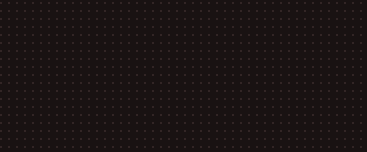

In [2]:
for root, dirs, files in os.walk('data'):
    if 'result.png' in files:
        img = Image.open(os.path.join(root, 'result.png'))
        break
img

In [3]:
h = hash(str(np.array(img)))
h

-749002673

In [4]:
id_to_image = {}
hash_to_image = {}
for root, dirs, files in os.walk('data'):
    if 'result.png' in files:
        img = Image.open(os.path.join(root, 'result.png'))
        id_to_image[os.path.basename(root)] = img
        h = hashlib.md5(img.tobytes()).hexdigest()
        hash_to_image[h] = img

In [5]:
len(id_to_image), len(hash_to_image)

(734, 204)

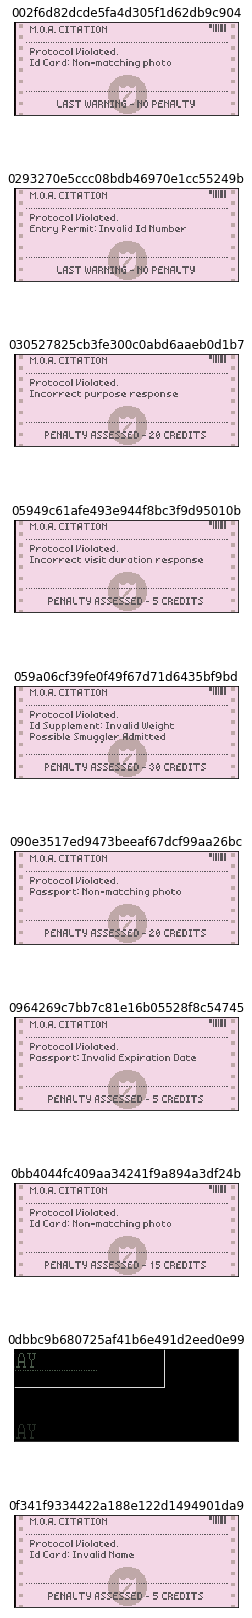

In [6]:
plt.figure(figsize=(4, 30))
display = 10
for i, k in enumerate(sorted(hash_to_image.keys())[:display]):
    plt.subplot(display, 1, i+1), plt.xticks([]), plt.yticks([]), plt.title(k), plt.imshow(hash_to_image[k]);

In [9]:
VIOLATIONS = [
    # entry permit
    'Entry Permit: Invalid Id Number',
    'Entry Permit: Invalid Expiration Date',
    'Entry Permit: Invalid Name',
    'Missing Entry Permit',
    'Forged Entry Permit',

    # passport
    'Missing Passport',
    'Passport: Invalid Gender',
    'Passport: Invalid Expiration Date',
    'Passport: Non-matching photo',
    'Passport: Invalid Issuing City',
    
    # id card
    'Missing Id Card',
    'Id Card: Invalid Birth Date',
    'Id Card: Non-matching photo',
    'Id Card: Invalid Weight',
    'Id Card: Invalid Height',
    'Id Card: Invalid Name',
    'Id Card: Invalid District',

    # id supplement
    'Missing Id Supplement',
    'Id Supplement: Invalid Expiration Date',
    'Id Supplement: Invalid Weight',
    'Id Supplement: Invalid Height',
    'Id Supplement: Invalid Thumbprint',
    'Id Supplement: Invalid Description',

    # responses
    'Incorrect purpose response',
    'Incorrect visit duration response',
    
    # Diplomatic
    'No Diplomatic Access to Arstotzka',
    'Diplomatic Auth: Invalid Name',
    'Diplomatic Auth: Invalid Id Number',
    'Forged Diplomatic Auth',

    # Work pass
    'Missing Work Pass',
    'Work Pass: Invalid Name',
    'Forged Work Pass',
    'Work Pass: Invalid Work End Date',

    # Wanted criminal
    'Wanted criminal admitted',
]

def find_violations(img):
    img = img.crop((20, 38, img.width-20, 112))
    data = ' '.join(pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)['text'])
    data = data.replace('Protocol Fiolated. ', '')
    data = data.replace('Protocol Hiolated. ', '')
    data = data.strip()
    data = data.replace('Trvalid', 'Invalid')
    data = data.replace('Humber', 'Number')
    data = data.replace('lleight', 'Weight')
    data = data.replace('llork', 'Work')
    data = data.replace('Hon-matching', 'Non-matching')
    data = data.replace('Inwalid eight', 'Invalid Weight')
    data = data.replace('Invalid ileight', 'Invalid Weight')
    data = data.replace('Ho Diplomatic Access', 'No Diplomatic Access')
    data = data.replace('!', ':')
    data = data.replace('Inwalid', 'Invalid')
    data = data.replace('Td Number', 'Id Number')
    data = data.replace('Invalid Lesuing City', 'Invalid Issuing City')
    data = data.replace('Td Supplement', 'Id Supplement')
    data = data.replace('Lgl humbprint', 'Invalid Thumbprint')
    data = data.replace('Invalid Jd Number', 'Invalid Id Number')
    data = data.replace('Invalid Nome', 'Invalid Name')
    data = data.replace('Invalid Hame', 'Invalid Name')
    data = data.strip()
    violations = [v for v in VIOLATIONS if v in data]
    for v in violations:
        data = data.replace(v, '')
    data = data.strip()
    for suffix in ('a,', ':', '.', ','):
        if data.endswith(suffix):
            data = data[:-len(suffix)].strip()
    data = data.strip()
    data = data.replace('  ', ' ')
    data = data.replace('Possible Smuqgler Admitted', '')
    data = data.replace('Possible Smuggler, Admitted', '')
    if len(data) > 0:
        raise Exception('exceeding text: "{}"'.format(data))
    return violations

[h for h, img in hash_to_image.items() if len(find_violations(img)) == 0]

['fc31124f8e4916df1bbce00a053c2b56',
 '70b52239802a0efd2e41c74c0a6071c4',
 'd42f4a99a5dd5935b8c0c76343cfbe82',
 'f16f7de3aaff47ea660ec315c5d466f1',
 'cfacee1a98a572b4ae6ed6bb01548a8e',
 'b6e481b3338ce4fdbd02e11d6fea8244',
 'a20cda6a9a894f56bf84b901163c0735',
 'a09227587774c9bc173b4011103ac6fd',
 '41f1a298ec0b4aa51a5af40873648a6f',
 '0dbbc9b680725af41b6e491d2eed0e99',
 '5678a1f4ad412dfbee60a97cc70fe7b5',
 'f60f83a086e9e1f51ea0d2d95a9e50d9',
 'b725f8d0e0a880aa25df6c399a977749',
 '3faaeffba2102a2f81ea2a57594a1742',
 '902b29f2bf3f0dbbfc89cbc36e5077df']

In [ ]:
images = [(h, img) for h, img in hash_to_image.items() if len(find_violations(img)) == 0]

In [18]:
hash_count = {}
for img in id_to_image.values():
    h = hashlib.md5(img.tobytes()).hexdigest()
    hash_count[h] = hash_count.get(h, 0) + 1

In [19]:
hash_count

{'fc31124f8e4916df1bbce00a053c2b56': 255,
 'ed60e80c5d289f36d37eb7445d735f6f': 4,
 '2c0888054322466df945efca0e69ec6b': 1,
 '2874d71066744dc7493998dc02dffe86': 2,
 '57af9baa92ea22577e398578d914cbe9': 6,
 '090e3517ed9473beeaf67dcf99aa26bc': 3,
 '1e64330b66df92cab8592af5cc260c33': 4,
 'd6b9dd5d2752b9d48b2d26182ec2cf01': 3,
 '9a8f1a58dabd18b32dbd3b6925b84193': 3,
 '98b1821a70ec93facf483da04430d938': 4,
 '277a191a09e03e9e900c712e9a5a155e': 4,
 '41f6e9e0dd0501bcf8b6e15724050e98': 7,
 '85e69a1bc1adbb11cd8ee398de33d70e': 3,
 'a6e605fdfe48991247f3d1fed1e2a59b': 3,
 '05949c61afe493e944f8bc3f9d95010b': 4,
 'b69262c62b3eaf1535a04baee96e3774': 4,
 'f73f64617de826bc463ea0ba34ccdbfa': 3,
 '70b52239802a0efd2e41c74c0a6071c4': 1,
 'bab134c06a56d173b1712dfc0a360961': 5,
 'fa20a8ad976068d70d740c9e0176ee9c': 1,
 'ce01cf48d56e8a6474e2c2836d79c737': 2,
 '38db2c63bee6579882b861e0a16b8c0d': 7,
 '6836a5f9596c8ed3955d11b0e9349960': 3,
 'b6accfb4a9a64d0805d70a45f1509092': 3,
 '90970c347d5164e4abe43ddf41eeb33d': 2

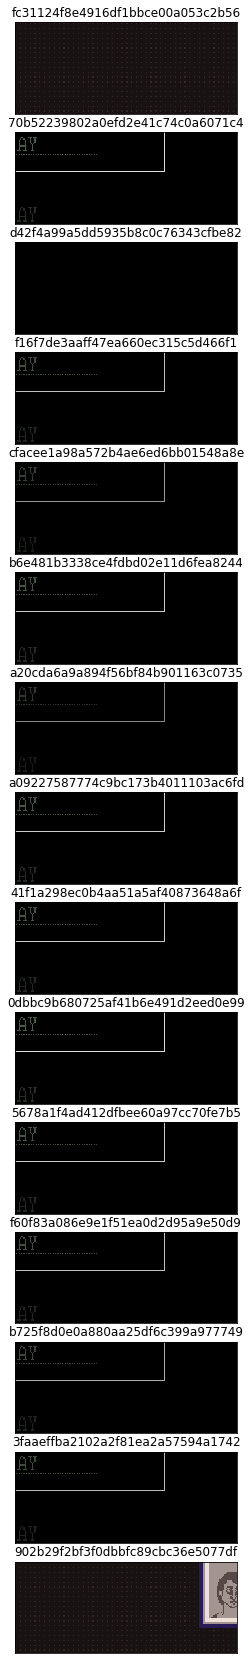

In [17]:
hashes = ['fc31124f8e4916df1bbce00a053c2b56',
 '70b52239802a0efd2e41c74c0a6071c4',
 'd42f4a99a5dd5935b8c0c76343cfbe82',
 'f16f7de3aaff47ea660ec315c5d466f1',
 'cfacee1a98a572b4ae6ed6bb01548a8e',
 'b6e481b3338ce4fdbd02e11d6fea8244',
 'a20cda6a9a894f56bf84b901163c0735',
 'a09227587774c9bc173b4011103ac6fd',
 '41f1a298ec0b4aa51a5af40873648a6f',
 '0dbbc9b680725af41b6e491d2eed0e99',
 '5678a1f4ad412dfbee60a97cc70fe7b5',
 'f60f83a086e9e1f51ea0d2d95a9e50d9',
 'b725f8d0e0a880aa25df6c399a977749',
 '3faaeffba2102a2f81ea2a57594a1742',
 '902b29f2bf3f0dbbfc89cbc36e5077df']

plt.figure(figsize=(10, 30))
for i, (h, img) in enumerate(images):
    plt.subplot(len(images), 1, 1+i), plt.title(h), plt.xticks([]), plt.yticks([]), plt.imshow(img)

In [24]:
hashes_to_remove = [
 '70b52239802a0efd2e41c74c0a6071c4',
 'd42f4a99a5dd5935b8c0c76343cfbe82',
 'f16f7de3aaff47ea660ec315c5d466f1',
 'cfacee1a98a572b4ae6ed6bb01548a8e',
 'b6e481b3338ce4fdbd02e11d6fea8244',
 'a20cda6a9a894f56bf84b901163c0735',
 'a09227587774c9bc173b4011103ac6fd',
 '41f1a298ec0b4aa51a5af40873648a6f',
 '0dbbc9b680725af41b6e491d2eed0e99',
 '5678a1f4ad412dfbee60a97cc70fe7b5',
 'f60f83a086e9e1f51ea0d2d95a9e50d9',
 'b725f8d0e0a880aa25df6c399a977749',
 '3faaeffba2102a2f81ea2a57594a1742',
 '902b29f2bf3f0dbbfc89cbc36e5077df']
for id, img in id_to_image.copy().items():
    h = hashlib.md5(img.tobytes()).hexdigest()
    if h in hashes_to_remove:
        del id_to_image[id]
        if h in hash_to_image:
            del hash_to_image[h]

In [25]:
len(id_to_image)

716

In [27]:
for k in id_to_image.keys():
    print(k)
    break

001dbbd7-741e-407c-807c-429a9c758cf9


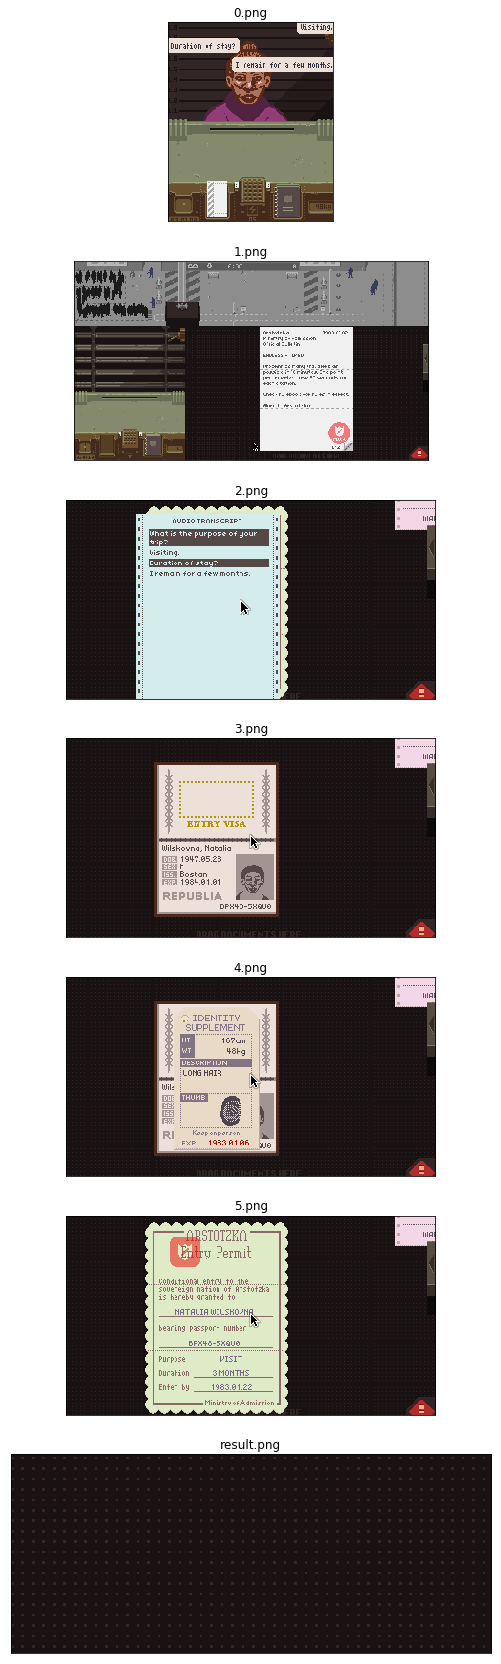

In [30]:
d = 'data/001dbbd7-741e-407c-807c-429a9c758cf9'
plt.figure(figsize=(10, 30))
for root, dirs, files in os.walk(d):
    for i, f in enumerate(files):
        plt.subplot(len(files), 1, 1+i), plt.title(f), plt.xticks([]), plt.yticks([]), plt.imshow(Image.open(os.path.join(d, f)))